In [100]:
# %matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [101]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [102]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [103]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [104]:
# reflect an existing database into a new model
Base = automap_base()

# reflect the tables
Base.prepare(autoload_with=engine)


In [105]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [106]:
# Save references to each table
measurement = Base.classes.measurement

stations = Base.classes.station

In [107]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [108]:
# Find the most recent date in the data set.
session.query(measurement.date).order_by(measurement.date.desc()).first()

('2017-08-23',)

In [109]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results 
# Starting from the most recent data point in the database.
# Calculate the date one year from the last date in data set.
year_ago = dt.date(2017,8,23) - dt.timedelta(days=365)

# Perform a query to retrieve the data and precipitation scores
prcp_data = session.query(measurement.date, measurement.prcp).\
    filter(measurement.date >= year_ago).all()


In [110]:
prcp_df = pd.DataFrame(prcp_data, columns=["Date", "Precipitation"])
prcp_df = prcp_df.sort_values("Date")
prcp_df.head()

,Date,Precipitation
0,2016-08-23,0.00
1009,2016-08-23,NaN
1529,2016-08-23,1.79
704,2016-08-23,0.05
361,2016-08-23,0.15


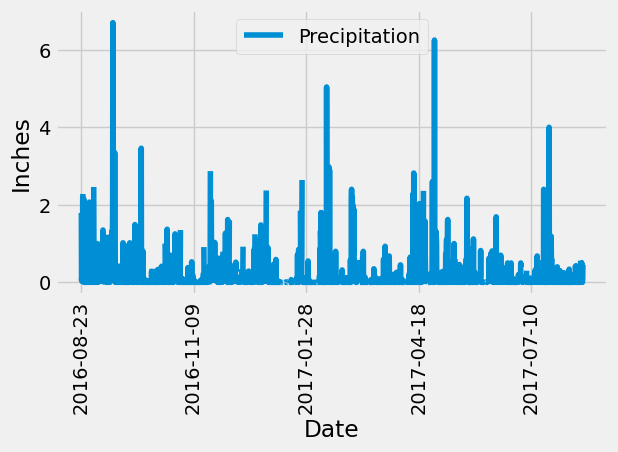

In [111]:
prcp_df.plot(x="Date", y="Precipitation", rot= 90)
plt.ylabel("Inches")
plt.tight_layout()
plt.show()

In [112]:
# Use Pandas to calculate the summary statistics for the precipitation data
prcp_df.describe()

,Precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [113]:
# Design a query to calculate the total number of stations in the dataset
session.query(measurement.station).distinct().count()

9

In [114]:
#Tutoring - sql way of counting
session.query(func.count(stations.station)).all()

[(9,)]

In [115]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
# List the stations and their counts in descending order.
session.query(measurement.station, func.count(measurement.station)).\
    group_by(measurement.station).order_by(func.count(measurement.station).desc()).all()

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [116]:
temp_measures = session.query(func.min(measurement.tobs), func.max(measurement.tobs),func.avg(measurement.tobs)).filter(measurement.station == "USC00519281").all()

print(f"The lowest reported temperature was {temp_measures[0][0]} degrees Farenheit.")
print(f"The highest reported temerature was {temp_measures[0][1]} degrees Farenheit.")
print(f"The average reported temerature is {np.round(temp_measures[0][2],2)} degrees Farenheit.")

The lowest reported temperature was 54.0 degrees Farenheit.
The highest reported temerature was 85.0 degrees Farenheit.
The average reported temerature is 71.66 degrees Farenheit.


Text(0, 0.5, 'Frequency')

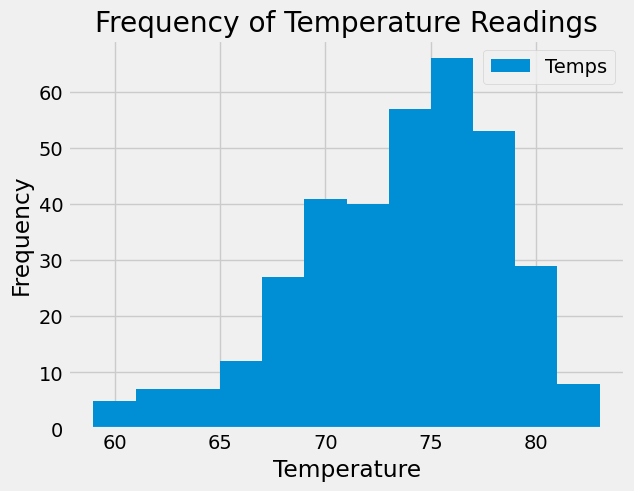

In [117]:
# Using the most active station id Query and
#the last 12 months of temperature observation data 
#for this station and plot the results as a histogram

active_station_temps = session.query(measurement.tobs).filter(measurement.station == "USC00519281").filter(measurement.date >= year_ago).all()

stations_df = pd.DataFrame(active_station_temps,columns=["Temps"])

stations_df.plot.hist(bins=12)
plt.title("Frequency of Temperature Readings")
plt.xlabel("Temperature")
plt.ylabel("Frequency")

# Close Session

In [118]:
# Close Session
session.close()